# [SWCON25301] Machine Learning
Teaching Assistant: 조수현 (bloodtype0@khu.ac.kr), 김영웅 (duddnd7575@khu.ac.kr) 

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

In [14]:
# 컴퓨터공학과 2022105705 신유진

---

# P1:  Linear/Polynomial Regression Model (10점)

### 학습목표
- 실습에 필요한 데이터 준비, 개발, 학습, 검증, 시각화 과정을 이해한다.
- Python, NumPy로 작성된 Linear Regression Model을 분석하고 이해한다.
- Python, NumPy로 Polynomial Regression Model class를 직접 작성하고 분석한다.
- Polynomial regression 문제를 Linear regression 문제로 바꾸어 해결할 수 있음을 이해한다.

### 실습내용

실습은 다음 순서로 진행됩니다.
학생분들께서는 **<구현>** 과 **<작성>** 에 해당하는 부분을 수행해주시면 됩니다.

- S1. Linear Regression Model 구현 및 분석
    - 1) 패키지 import
    - 2) 데이터셋 생성
    - 3) Linear Regression Model 구현 **<구현>**
    - 4) 학습 및 결과 시각화

<br>

- S2. Polynomial Regression Model 구현 및 분석
    - 1) Polynomial Regression Model 구현
    - 2) 학습 및 결과 시각화
    - 3) Polynomial Regression Model 분석 

<br>

- S3. Discussion **<작성>**


--- 

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록 합니다.


### 점수
- 1-3) Linear regression model class 구현: **6점**
- 2-1) Polynomial regression model class 구현
- 2-3) Polynomial Regression Model 분석: **2점**
- Discussion: **2점**

### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> Download/export as -> HTML)도 함께 제출하세요. 하나만 제출할시 2점 감점이 있습니다.

---

## S1. Linear regression model 분석

S1에서는 2차원 평면 상의 데이터에 대하여 해당 데이터를 잘 표현할 수 있는 선형 회귀 모델(Linear Regression Model)을 학습하고 평가합니다.

### 1-1) Import packages
**수정하지 마세요.**

In [15]:
from random import random as rand
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1-2) Loading the Dataset
**수정하지 마세요.** 

학습과 테스트에 사용할 데이터를 생성합니다.

In [16]:
# Random seed
random.seed(1234)

# Generate 2-dimensional data points
X = [rand() * i * 0.5 - 20 for i in range(0, 100)]
y = [x**3 * 0.002 - x**2 * 0.005 + x * 0.003 + rand() * 5 for x in X]
print(len(X), len(y))

100 100


Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [17]:
# Data random shuffle
idx = list(range(len(X)))
random.shuffle(idx)

# Split data for train/test
X_train, X_test = np.array([X[i] for i in idx[:80]])[:, None], np.array([X[i] for i in idx[80:]])[:, None]
y_train, y_test = np.array([y[i] for i in idx[:80]])[:, None], np.array([y[i] for i in idx[80:]])[:, None]

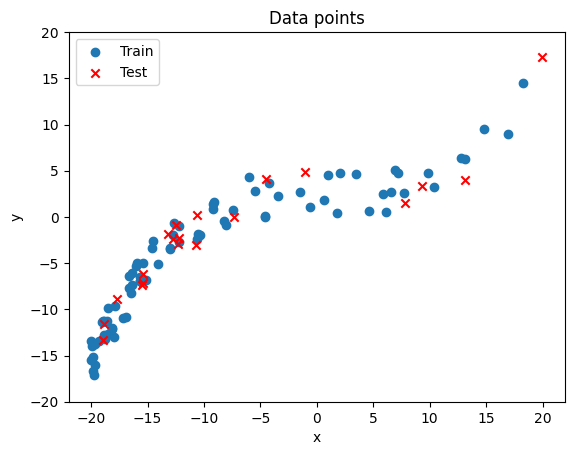

In [18]:
# 학습 데이터를 시각화하여 분포를 확인
plt.scatter(
    [i for idx, i in enumerate(X_train)],
    [i for idx, i in enumerate(y_train)],
    label="Train",
    marker="o",
)

plt.scatter(
    [i for idx, i in enumerate(X_test)],
    [i for idx, i in enumerate(y_test)],
    label="Test",
    marker="x",
    color="r",
)

plt.title("Data points")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim([-20, 20])
plt.legend()
plt.show()

### 1-3) Linear Regression Model 구현

`Linear` class는 다음 함수들로 이루어져 있습니다.
- `__init__` 생성자에서는 model의 가중치를 초기화합니다.
- `calc_loss_and_gradient`는 input과 output 사이의 MSE loss와 그 gradient를 계산합니다.
- `shuffle_datasets`는 데이터셋을 섞는 역할을 합니다.
- `forward`에서는 input을 model의 가중치를 이용해서 예측을 수행합니다.
- `update_parameters`에서는 계산된 MSE loss와 그 gradient를 입력으로 받아 모델의 가중치를 업데이트 합니다.  
- `fit`에서는 model을 학습하는 과정으로 `forward`와 `update_parameters`를 차례로 반복하여 model의 가중치를 업데이트 합니다.
- `predict`에서는 들어온 input data를 학습된 가중치를 이용하여 예측하고 결과를 반환합니다.

**학생분들께서는 `Linear` class 내의 함수 중 `forward`과 `calc_loss_and_gradient`을 일부 작성하게 됩니다.**

In [19]:
class Linear:
    def __init__(self, batch_size, lr=1e-5):
        # initialization with a numpy array type
        self.theta = np.array([rand(), rand()])[:, None]
        self.lr = lr  # learning rate
        self.batch_size = batch_size

    def shuffle_datasets(self, a, b):
        assert len(a) == len(b)
        p = np.random.permutation(len(a))
        return np.take(a, p, axis=0), np.take(b, p, axis=0)

    def fit(self, x, y, epochs):
        x_original, y_original = x, y # shuffle 전 dataset
        for e in range(epochs):  # epochs 만큼 학습
            # shuffle dataset
            x, y = self.shuffle_datasets(x_original, y_original)

            # 배치 크기씩 data 분할
            num_batches = len(x) // self.batch_size
            
            # batch size 크기의 배수가 아닌 나머지 training example 개수
            remain = (len(x) % self.batch_size) 
            
            # remain을 제외한 training example만 사용
            x = x[remain:]
            y = y[remain:]

            # 배치 크기씩 데이터 분할
            x = np.array_split(x, num_batches, axis=0)  
            y = np.array_split(y, num_batches, axis=0)

            # 각 배치마다 파라미터 업데이트
            # 배치 하나씩 학습
            for batch_x_y in zip(x, y):  
                batch_x, batch_y = batch_x_y

                # x0는 항상 1이므로, 학습 배치에 대해 x0를 추가
                batch_x = self.append_x0(batch_x)
                pred = self.forward(batch_x)

                # gradient 계산 과정을 backward pass로도 부름
                _, gradient = self.calc_loss_and_gradient(pred, batch_y, batch_x)

                self.update_parameters(gradient)

    def forward(self, x):
        # "vector form"으로 모델의 출력을 계산하세요. 
        # 행렬곱은 "@"으로 계산할 수 있습니다. ex) X @ Y
        # transposed vector는 .T를 붙여 나타낼 수 있습니다. ex) X.T
        prediction = x @ self.theta
        return prediction

    def append_x0(self, batch_x):
        # x_0는 항상 1
        x0 = np.array([1])[:, None].repeat(batch_x.shape[0], 0)
        batch_x = np.concatenate((x0, batch_x), 1)
        return batch_x

    @staticmethod
    def calc_loss_and_gradient(pred, y, x):
        # computes the prediction error and its derivative
        # "vector form"으로 유도된 그래디언트를 계산하세요.
        loss = (pred - y).T @ (pred - y)  # MSE loss
        gradient = 2 * x.T @ (pred - y)
        return loss, gradient

    def update_parameters(self, gradient):
        self.theta -= gradient.mean(axis=-1, keepdims=True) * self.lr

    def predict(self, x_test):
        # 학습이 끝난 모델의 출력을 얻기 위한 함수
        x_test = self.append_x0(x_test)
        predictions = self.forward(x_test)
        return predictions

### 1-4) 학습 및 결과 시각화
**수정하지 마세요.**

작성한 `Linear` class와 Trainset을 이용해 1차 선형 회귀 모델을 학습시키고 학습된 모델의 평가 결과를 시각화합니다.

In [20]:
# Define a model
linear = Linear(batch_size=4)  #  위에서 구현한 Linear regression model 모델 생성

# Training
linear.fit(X_train, y_train, 100)  #  100 epoch 학습

# Print weight and bias
for i, th in enumerate(linear.theta):
    print(f"theta_{i}: {th[0]:0.6f}")


theta_0: 0.699267
theta_1: 0.557444


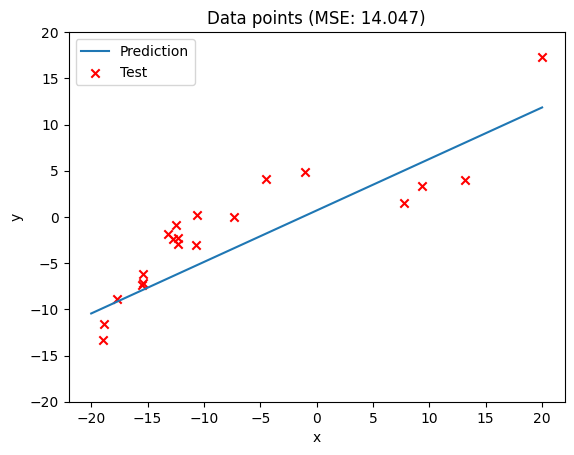

In [21]:
def plot(model):
    # Range of X
    x = np.linspace(-20, 20, 50)[:, None]

    # Plotting model
    plt.plot(x, model.predict(x), label="Prediction")

    # Plotting test data points
    plt.scatter(
        X_test,
        y_test,
        label="Test",
        marker="x",
        color="r",
    )

    # Calculate MSE (Mean Square Error) of test data
    y_pred = model.predict(X_test)
    mse = np.mean((y_pred.squeeze() - y_test.squeeze()) ** 2)

    plt.title(f"Data points (MSE: {mse:0.3f})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.ylim([-20, 20])
    plt.legend()
    plt.show()


plot(linear)

## S2. Polynomial Regression Model

**수정하지 마세요.**

1차 Linear Regression Model은 1차 Polynomial Regression Model과 동일하다고 볼 수 있습니다.  
또한, Polynomial Regression Model은 Linear Regression Model로 변환하여 풀 수 있음을 배웠습니다.

S2에서는 `Linear` class를 상속받아, 1차 이상의 차수를 가진 Polynomial Regression Model을 반환하는 `Polynomial` class를 구현할 수 있음을 확인합니다.

`Polynomial` class는 다음 함수들로 이루어져 있습니다.
- `__init__` 생성자에서는 model의 weights와 bias를 초기화합니다.
- `polynomial_to_linear`는 주어진 x에 대해 polynomial regression model을 linear regression model로 풀 수 있도록 변환합니다.
- `forward`에서는 input을 model의 가중치를 이용해서 예측을 수행합니다.
- `fit`에서는 model을 학습하는 과정으로 `forward`와 `update_parameters`를 차례로 반복하여 model의 가중치를 업데이트 합니다.
- `predict`에서는 들어온 input data를 학습된 가중치를 이용하여 예측하고 결과를 반환합니다.


### 2-1) Polynomial Regression Model 구현

**수정하지 마세요.**

In [22]:
class Polynomial(Linear):
    def __init__(self, dim, **kwargs):
        super().__init__(**kwargs)
        self.dim = dim
        # initialization with a numpy array type
        theta = [1.5] + [0.0001 for _ in range(self.dim)]
        self.theta = np.array(theta)[:, None]

    def fit(self, x, y, epochs):
        x_original, y_original = x, y # shuffle 전 dataset
        for e in range(epochs):  # epochs 만큼 학습
            # shuffle dataset
            x, y = self.shuffle_datasets(x_original, y_original)

            # 배치 크기씩 data 분할
            num_batches = len(x) // self.batch_size
            
            # batch size 크기의 배수가 아닌 나머지 training example 개수
            remain = (len(x) % self.batch_size) 
            
            # remain을 제외한 training example만 사용
            x = x[remain:]
            y = y[remain:]

            # 배치 크기씩 데이터 분할
            x = np.array_split(x, num_batches, axis=0)  
            y = np.array_split(y, num_batches, axis=0)

            # 각 배치마다 파라미터 업데이트
            # 배치 하나씩 학습
            for batch_x_y in zip(x, y):  
                batch_x, batch_y = batch_x_y

                # 각 배치의 x에 대해, polynomial regression을 linear regression 문제로 환원하여 풀 수 있도록 변환
                # (ppt 15쪽을 참고하세요.)
                batch_x = self.polynomial_to_linear(batch_x)
                batch_x = self.append_x0(batch_x)
    
                pred = self.forward(batch_x)

                # gradient 계산 과정을 backward pass로도 부름
                _, gradient = self.calc_loss_and_gradient(pred, batch_y, batch_x)

                self.update_parameters(gradient)
    
    def polynomial_to_linear(self, batch_x):
        original_batch_x = batch_x
        for i in range(2, self.dim + 1):
            x_i = original_batch_x ** i
            batch_x = np.concatenate((batch_x, x_i), -1)
        return batch_x

    def predict(self, x):
        # computes the predictions with forward()
        x = self.polynomial_to_linear(x)
        x = self.append_x0(x)
        predictions = self.forward(x)
        return predictions


### 2-2) 다항 회귀 모델 학습 및 결과 시각화
**수정하지 마세요.**

작성한 `Polynomial` class와 Trainset을 이용해 2차 다항 회귀 모델을 학습시키고 학습된 모델의 평가 결과를 시각화합니다.

In [23]:
# Model define and training

# Define a model
# 위에서 구현한 Polynomial regression model 모델 정의
polynomial = Polynomial(dim=2, batch_size=4, lr=1e-6)

# Training
polynomial.fit(X_train, y_train, 100)  # 100 epoch 학습

for i, th in enumerate(polynomial.theta):
    print(f"theta_{i}: {th[0]:0.6f}")

theta_0: 1.514511
theta_1: 0.301071
theta_2: -0.019611


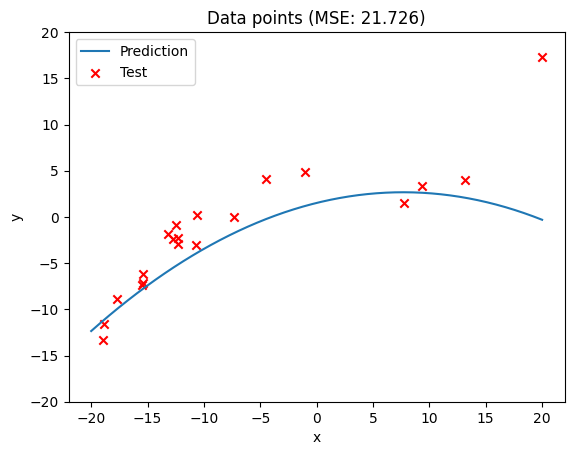

In [24]:
# Plots polynomial and data points
plot(polynomial)

### 2-3) 다항 회귀 모델 분석 **(2점, 부분점수 없음)**

2-2)를 수정하여 1차부터 4차 다항 회귀 모델 중 주어진 데이터셋을 가장 잘 표현하는 차수의 모델 1개를 학습하고 결과를 시각화 하세요. 

- 2-2) 코드를 참고하여 작성합니다. (learning rate, dim, batch size, training epoch 등 변경)
- 다양한 시도를 통해 스스로 최적의 차수와 학습 조건을 찾아보세요. 
- 제출 시 MSE 기준 3 이하일 경우 정답으로 채점
- MSE 값이 nan 값인 경우 learning rate 파라메터를 조정하면 해결할 수 있습니다.

In [25]:
# Model define and training
# 위에서 구현한 Polynomial regression model 모델 정의

polynomial = Polynomial(dim=3, batch_size=4, lr=1e-8)

# Training
polynomial.fit(X_train, y_train, 500)

for i, th in enumerate(polynomial.theta):
    print(f"theta_{i}: {th[0]:0.6f}")

theta_0: 1.500215
theta_1: -0.000115
theta_2: 0.000162
theta_3: 0.001911


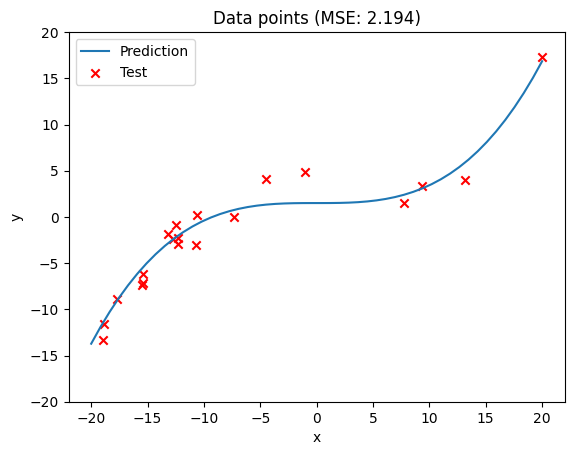

In [26]:
# Plotting polynomial and data points
plot(polynomial)

## S3. Discussion (2점)

**1) 본 실습에서 구현한 `Polynomial` class는 Feature Normalization을 사용하지 않았습니다.**

1. 본 실습에서의 상황을 예시로 Feature Normalization을 수행하는 방법을 설명하고,

2. 수업 시간에 배운 내용을 기반으로 Feature Normalization을 수행했을 때의 효과에 대해서 논하세요.

[답변작성]:
1. **Feature Normalization 수행 방법**:
본 실습의 `Polynomial` 클래스에서 `polynomial_to_linear` 메서드가 호출된 후, 각 feature(x, x^2, x^3, ...)에 대해 Z-score 정규화(Standardization)를 적용할 수 있습니다. 학습 데이터셋(`X_train`)의 각 feature별로 평균과 표준편차를 계산한 뒤, 모든 데이터(학습, 테스트)에 대해 `(x - 평균) / 표준편차` 공식을 적용하여 정규화를 수행합니다. 이 때, 테스트 데이터는 학습 데이터의 평균과 표준편차를 사용하여 정규화해야 합니다.

2. **Feature Normalization의 효과**:
다항 회귀에서는 차수가 높아질수록 feature 값의 범위가 매우 커집니다(예: x와 x^3). 이렇게 feature 간의 스케일 차이가 크면 경사 하강법(gradient descent) 알고리즘에서 손실 함수의 등고선이 한쪽으로 길게 늘어진 타원형이 되어 최적점을 찾아가는 과정이 비효율적이고 불안정해질 수 있습니다. Feature Normalization을 통해 각 feature의 값 범위를 비슷하게 맞춰주면, 손실 함수의 등고선이 원형에 가까워져 경사 하강법이 더 빠르고 안정적으로 최적점에 수렴하도록 돕습니다. 또한, 더 큰 학습률(learning rate)을 사용할 수 있게 하여 학습 속도를 높이는 효과도 있습니다.

---

**2) 배치 크기에 따라 full batch, minibatch, online mode training을 할 수 있습니다. Polynomial class에서 각 mode로 학습해 본 다음, 관찰한 모델의 성능 및 학습 속도 등 차이를 자유롭게 설명하세요.**



[답변작성]:
- **Full-batch (batch_size = 80)**: 전체 학습 데이터를 사용하여 한 번의 에포크에 한 번만 파라미터를 업데이트합니다. 그래디언트가 전체 데이터셋에 대해 계산되므로 파라미터 업데이트 방향이 안정적이고 부드럽게 최적점으로 수렴합니다. 하지만 데이터셋이 클 경우 메모리 소모가 크고, 한 번의 업데이트에 많은 계산량이 필요하여 학습 속도가 느릴 수 있습니다.

- **Minibatch (batch_size = 4)**: 학습 데이터를 여러 개의 작은 묶음(미니배치)으로 나누어 각 미니배치마다 파라미터를 업데이트합니다. Full-batch보다 파라미터 업데이트가 자주 일어나므로 학습 속도가 빠르고, 적절한 노이즈가 추가되어 지역 최적점(local minima)을 탈출하는 데 도움이 될 수 있습니다. Full-batch와 Online mode의 장점을 절충한 방식으로 가장 일반적으로 사용됩니다.

- **Online mode (batch_size = 1)**: 데이터 샘플 하나마다 파라미터를 업데이트합니다. Stochastic Gradient Descent(SGD)라고도 불립니다. 파라미터 업데이트가 매우 빈번하여 학습 속도가 빠를 수 있지만, 그래디언트의 변동성이 매우 커서 학습 과정이 불안정하고 수렴하는 데 시간이 더 오래 걸릴 수 있습니다. 하지만 이러한 변동성 덕분에 지역 최적점에서 더 쉽게 벗어날 수 있는 장점도 있습니다.